In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
from operator import itemgetter

import first
import thinkstats2

# Set up
import json
import pandas as pd
import datetime
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 800)


# Business Data

### Get Restaurant Data

In [2]:
bus = pd.read_json("yelp_academic_dataset_business.json", lines=True)
bus.columns.values
#bus.categories.value_counts().sort_index()

array(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'], dtype=object)

In [3]:
#Filter out null categories then get only categories like restraurant, food and bar
bus= bus[~bus['categories'].isnull()]
bus_rest = bus.query('categories.str.contains("Restaurants") or categories.str.contains("Food")', engine='python')
bus_rest.categories
bus_rest.shape

(64616, 14)

### Star Rating 

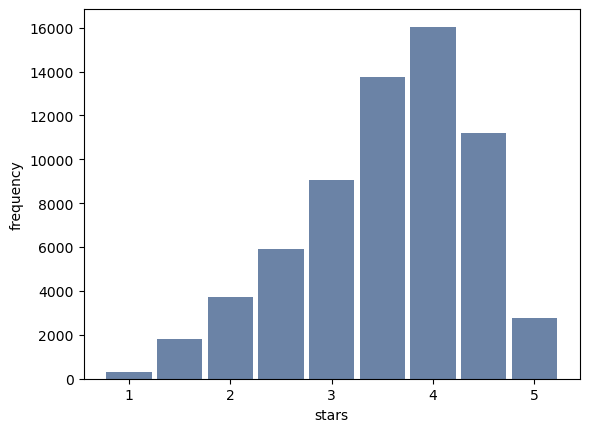

In [4]:
hist_rc = thinkstats2.Hist(bus_rest.stars)
import thinkplot
thinkplot.Hist(hist_rc)
thinkplot.Config(xlabel='stars', ylabel='frequency')

In [82]:
stars_mean=bus_rest.stars.mean()
stars_var=bus_rest.stars.var()
stars_std=bus_rest.stars.std()

stars_mean, stars_var, stars_std

(3.54595610994181, 0.7291771776143263, 0.8539187183885398)

### Review Count

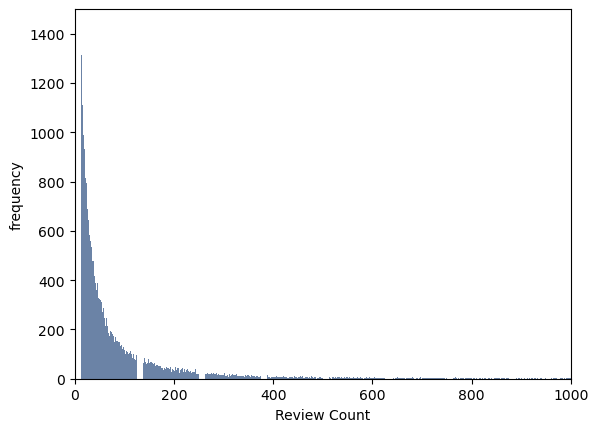

In [66]:
hist_rc = thinkstats2.Hist(bus_rest.review_count)
import thinkplot
axis = [0, 1000, 0, 1500]
thinkplot.Hist(hist_rc)
thinkplot.Config(xlabel='Review Count', ylabel='frequency', axis=axis)

In [11]:
rc_mean=bus_rest.review_count.mean()
rc_var=bus_rest.review_count.var()
rc_std=bus_rest.review_count.std()

rc_mean, stars_var, stars_std

(76.61408938962487, 0.7291771776143263, 0.8539187183885398)

In [83]:
bus_rest.describe()


,latitude,longitude,stars,review_count,is_open
count,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000
mean,36.969131,-88.095324,3.545956,76.614089,0.689953
std,6.019271,14.024538,0.853919,173.383983,0.462516
min,27.564457,-120.083748,1.000000,5.000000,0.000000
25%,32.207349,-90.247145,3.000000,12.000000,0.000000
50%,39.479423,-86.048171,3.500000,28.000000,1.000000
75%,39.958128,-75.346978,4.000000,75.000000,1.000000
max,53.679197,-74.661348,5.000000,7568.000000,1.000000


### Get the number of Features or Attribute that is true for the establishment

In [5]:
    attributes_count = []
    for idx, row in bus_rest['attributes'].iteritems():
        att_count = 0
        if row is None:
             attributes_count.append(att_count) #This is to Handle rows without Attributes or column is NonType
        else:
            for i in row:
                if row[i] == "True":
                    att_count = att_count + 1
                    #print(att_count)
            attributes_count.append(att_count)
    bus_rest['attribute_count']=attributes_count    

C:\Users\janin\AppData\Local\Temp\ipykernel_8556\3678255082.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_rest['attribute_count']=attributes_count


### attribute_count histogram

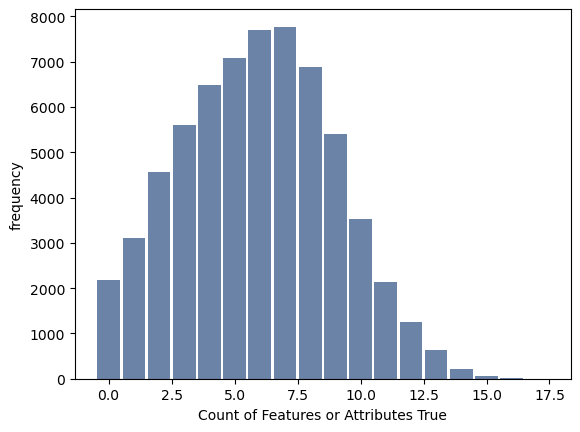

In [88]:
hist_ac = thinkstats2.Hist(bus_rest.attribute_count)
import thinkplot
thinkplot.Hist(hist_ac)
thinkplot.Config(xlabel='Count of Features or Attributes True', ylabel='frequency')

### Get Price Range 

In [6]:
RestaurantsPriceRange2=[]
for idx, row in bus_rest['attributes'].iteritems():
    if row is None:
        RestaurantsPriceRange2.append(None) #This is to Handle rows without Attributes or column is NonType
    else:
        l=row.keys()
        if 'RestaurantsPriceRange2' in l:
            RestaurantsPriceRange2.append(row['RestaurantsPriceRange2'])
        else:
            RestaurantsPriceRange2.append(None)
     
bus_rest['RestaurantsPriceRange2']=RestaurantsPriceRange2

C:\Users\janin\AppData\Local\Temp\ipykernel_8556\3203000271.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_rest['RestaurantsPriceRange2']=RestaurantsPriceRange2


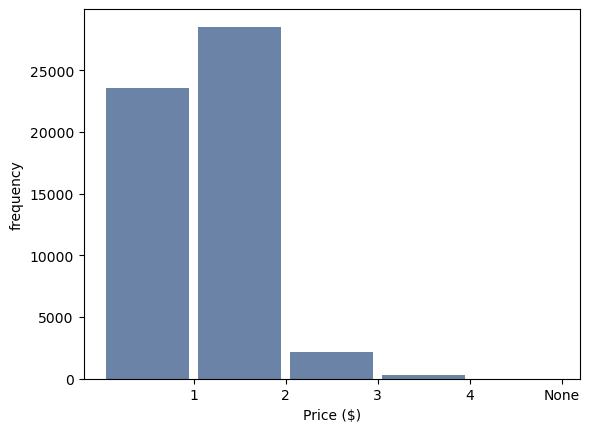

In [8]:
hist_price = thinkstats2.Hist(bus_rest.RestaurantsPriceRange2)
import thinkplot
thinkplot.Hist(hist_price)
thinkplot.Config(xlabel='Price ($)', ylabel='frequency')

# CHECK-IN DATA

In [9]:
df_checkin = pd.read_json("yelp_academic_dataset_checkin.json", lines=True)
print(df_checkin.columns.values)

['business_id' 'date']


### Count the number of checkin date from the date fields which is comma delimited

In [10]:
df_checkin.head()

# Get the count of check-in date
df_checkin['checkin_count'] = df_checkin.date.str.count(',') 

#Validate if correct 
df_checkin[df_checkin.business_id=='el83zfEgg_5bBz5Et9rZ6Q']    

,business_id,date,checkin_count
87962,el83zfEgg_5bBz5Et9rZ6Q,"2019-12-24 00:14:38, 2020-03-08 18:44:04, 2020-03-08 18:44:38, 2020-04-03 21:59:24, 2020-04-21 23:05:03, 2020-08-27 21:47:02, 2020-09-13 22:00:34, 2020-10-10 22:44:51, 2021-02-22 23:26:57, 2021-03-21 18:53:10, 2021-04-09 23:38:36, 2021-04-27 22:13:12, 2021-05-07 23:36:26, 2021-06-04 18:15:18, 2021-06-30 22:41:55, 2021-07-02 21:35:04, 2021-07-04 19:47:17, 2021-09-12 23:24:59",17


Join to get the business details

In [12]:
df_checkin_bus=df_checkin.join(bus_rest.set_index('business_id'), on='business_id', how='inner')
df_checkin_bus.shape

df_checkin_bus.head(1)

,business_id,date,checkin_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21:02:03, 2021-05-25 21:16:54, 2021-08-06 21:08:08, 2021-10-02 15:15:42, 2021-11-11 16:23:50",10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None


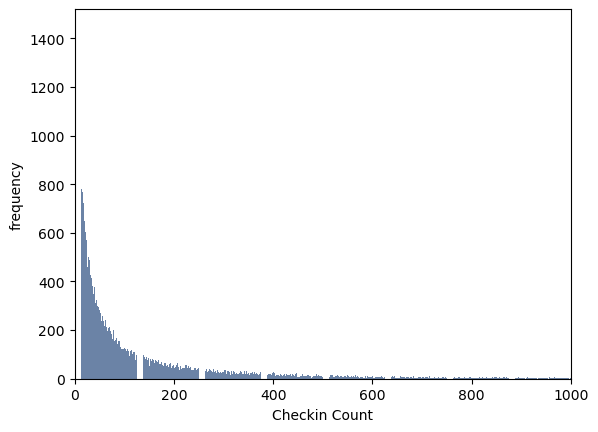

In [13]:
hist_ci = thinkstats2.Hist(df_checkin_bus.checkin_count)
import thinkplot
thinkplot.Hist(hist_ci)
thinkplot.Config(xlabel='Checkin Count', ylabel='frequency' , xlim=[0, 1000])

Get the Checkin Date

In [14]:
df_checkin_bus_yr = df_checkin_bus.assign(date=df_checkin.date.str.split(",")).explode('date')

df_checkin_bus_yr.head(2)

,business_id,date,checkin_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None


Add Year Column from the checkin date

In [15]:
df_checkin_bus_yr['yyyy']=pd.to_datetime(df_checkin_bus_yr['date']).dt.year

df_checkin_bus_yr.head(2)

,business_id,date,checkin_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2,yyyy
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None,2020
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None,2020


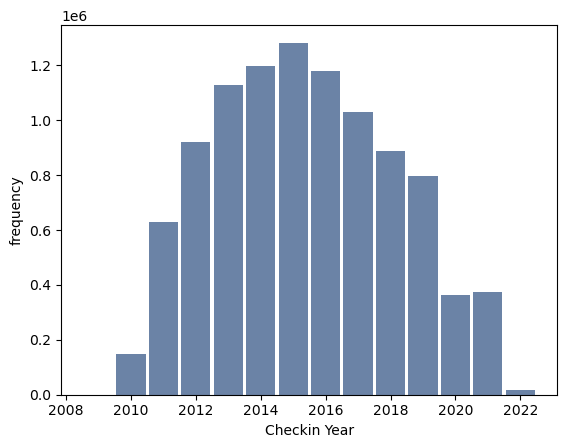

In [16]:
hist_ci_year = thinkstats2.Hist(df_checkin_bus_yr.yyyy)
import thinkplot
thinkplot.Hist(hist_ci_year)
thinkplot.Config(xlabel='Checkin Year', ylabel='frequency' )

In [37]:
ci_mean=df_comb.checkin_count.mean()
ci_var=df_comb.checkin_count.var()
ci_std=df_comb.checkin_count.std()

ci_mean, ci_var, ci_std

(156.29651162790697, 191785.93486167738, 437.9337105792124)

In [17]:
bus_rest.describe()


,latitude,longitude,stars,review_count,is_open,attribute_count
count,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000
mean,36.969131,-88.095324,3.545956,76.614089,0.689953,5.894175
std,6.019271,14.024538,0.853919,173.383983,0.462516,3.053842
min,27.564457,-120.083748,1.000000,5.000000,0.000000,0.000000
25%,32.207349,-90.247145,3.000000,12.000000,0.000000,4.000000
50%,39.479423,-86.048171,3.500000,28.000000,1.000000,6.000000
75%,39.958128,-75.346978,4.000000,75.000000,1.000000,8.000000
max,53.679197,-74.661348,5.000000,7568.000000,1.000000,17.000000


# TIP DATA

In [154]:
tip = pd.read_json("yelp_academic_dataset_tip.json", lines=True)
print(tip.columns.values)

['user_id' 'business_id' 'text' 'date' 'compliment_count']


In [155]:
tip=tip.join(bus_rest.set_index('business_id'), on='business_id', how='inner')
tip.shape

(718687, 20)

In [156]:
tip.head(1)

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1


In [157]:
tip['Year_Tip']=pd.to_datetime(tip['date']).dt.year

tip.head()

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2,Year_Tip
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2013
2956,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2012
10197,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2012
12900,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban sandwich. You can smell

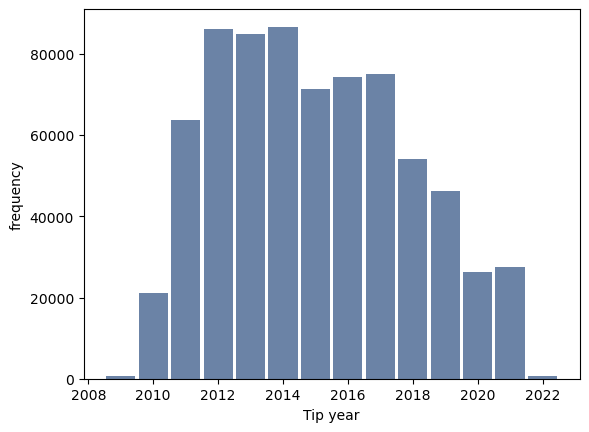

In [158]:
hist_tip = thinkstats2.Hist(tip.Year_Tip)
import thinkplot
thinkplot.Hist(hist_tip)
thinkplot.Config(xlabel='Tip year', ylabel='frequency')

Get the Tip Count per business

In [160]:
tip.business_id.value_counts().sort_index()

tip_bus=tip.business_id.value_counts().sort_index().rename_axis('business_id').reset_index(name='counts')

tip_bus.head()


,business_id,counts
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--7PUidqRWpRSpXebiyxTg,3
3,--8IbOsAAxjKRoYsBFL-PA,4
4,--MbOh2O1pATkXa7xbU6LA,10


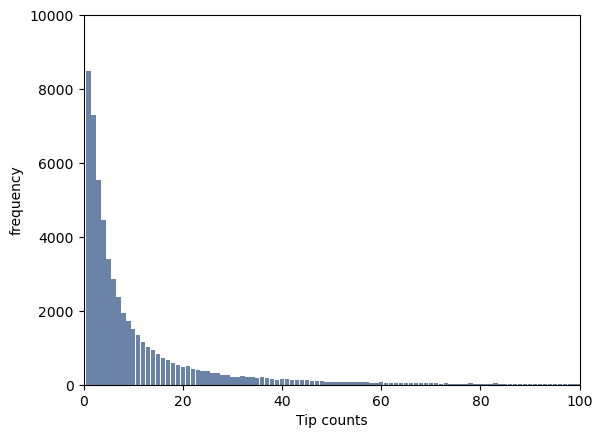

In [201]:
hist_tip = thinkstats2.Hist(tip_bus.counts)
import thinkplot
axis = [0, 100, 0, 10000]
thinkplot.Hist(hist_tip)
thinkplot.Config(xlabel='Tip counts', ylabel='frequency', axis=axis)

In [200]:
tip_mean=tip_bus.counts.mean()
tip_var=tip_bus.counts.var()
tip_std=tip_bus.counts.std()

tip_mean, tip_var, tip_std

(12.640477698044181, 704.2123296915441, 26.536999259365107)

## Compare Two Scenarios

Comparing Variables in business dataset

### Star Rating

In [172]:
df_rest_open=bus_rest[bus_rest.is_open==1]  # 1 = Open
df_rest_close=bus_rest[bus_rest.is_open==0] # 0 = Close


In [174]:
hist_open_stars = thinkstats2.Hist(df_rest_open.stars, label="Open")
hist_close_stars = thinkstats2.Hist(df_rest_close.stars, label="Close")

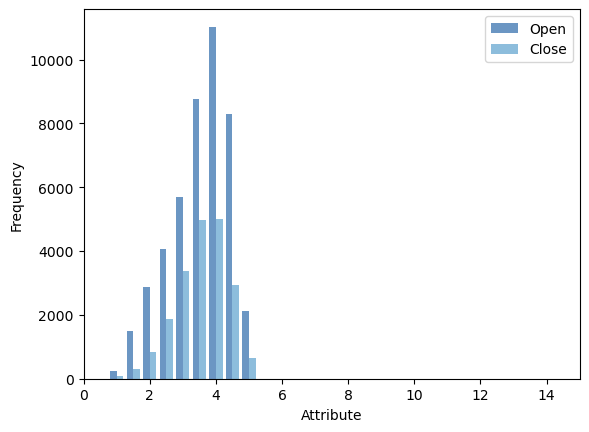

In [178]:
width = 0.2
thinkplot.PrePlot(2)
thinkplot.Hist(hist_open_stars, align='right', width=width)
thinkplot.Hist(hist_close_stars, align='left', width=width)
thinkplot.Config(xlabel='Attribute', ylabel='Frequency', xlim=[0, 15])

Dataframe for different scenarios

In [191]:
df_rest_open=bus_rest[bus_rest.is_open==1]  # 1 = Open
df_rest_close=bus_rest[bus_rest.is_open==0] # 0 = Close


df_rest_low=bus_rest.query("is_open==1 and stars<=2")  # stars rating low
df_rest_med=bus_rest.query("is_open==1 and stars in (3,4)")  # stars rating med
df_rest_high=bus_rest.query("is_open==1 and stars > 4 ")  # stars rating high


PMF

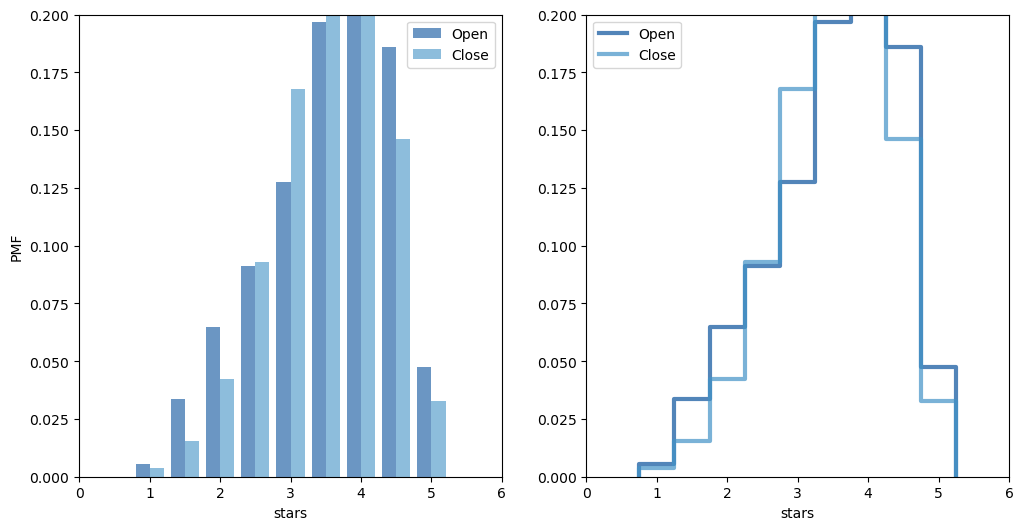

In [202]:
open_pmf = thinkstats2.Pmf(df_rest_open.stars, label="Open")
close_pmf = thinkstats2.Pmf(df_rest_close.stars, label="Close")

width = 0.2
axis = [0, 6, 0, 0.2]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(open_pmf, align="right", width=width)
thinkplot.Hist(close_pmf, align="left", width=width)
thinkplot.Config(xlabel="stars", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([open_pmf, close_pmf])
thinkplot.Config(xlabel="stars", axis=axis)

In [195]:
df_rest_open.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'attribute_count',
       'RestaurantsPriceRange2'],
      dtype='object')

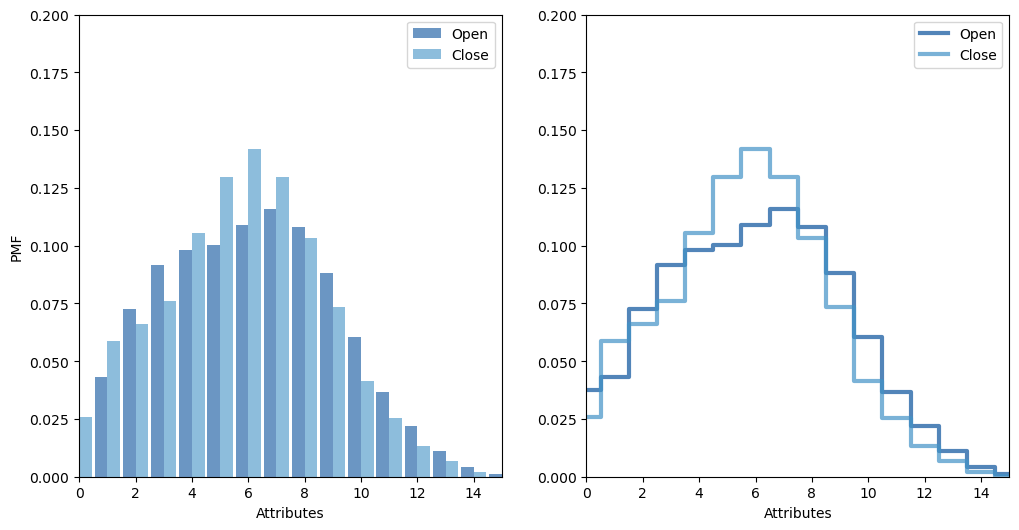

In [203]:
open_pmf = thinkstats2.Pmf(df_rest_open.attribute_count, label="Open")
close_pmf = thinkstats2.Pmf(df_rest_close.attribute_count, label="Close")

width = 0.45
axis = [0, 15, 0, 0.2]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(open_pmf, align="right", width=width)
thinkplot.Hist(close_pmf, align="left", width=width)
thinkplot.Config(xlabel="Attributes", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([open_pmf, close_pmf])
thinkplot.Config(xlabel="Attributes", axis=axis)


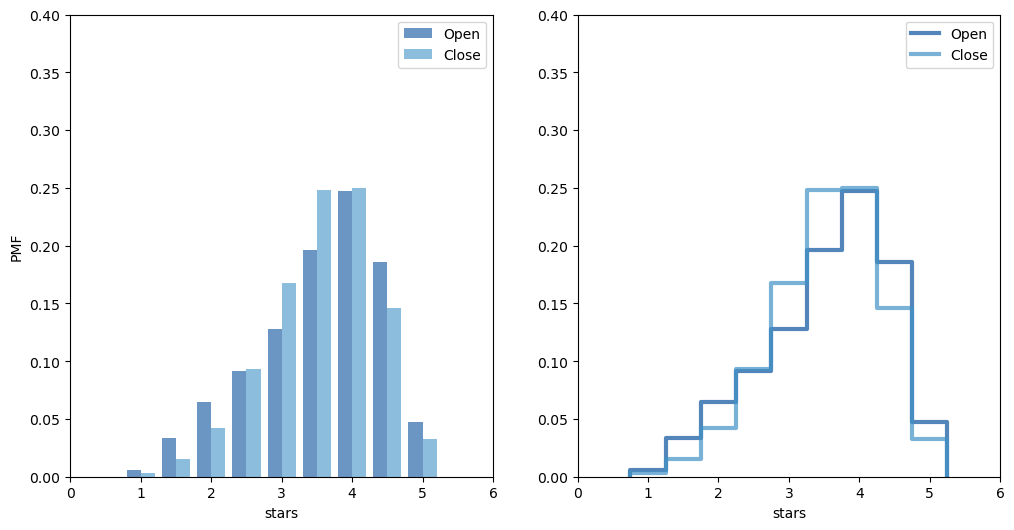

In [43]:
open_pmf = thinkstats2.Pmf(df_rest_open.stars, label="Open")
close_pmf = thinkstats2.Pmf(df_rest_close.stars, label="Close")

width = 0.2
axis = [0, 6, 0, 0.4]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(open_pmf, align="right", width=width)
thinkplot.Hist(close_pmf, align="left", width=width)
thinkplot.Config(xlabel="stars", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([open_pmf, close_pmf])
thinkplot.Config(xlabel="stars", axis=axis)

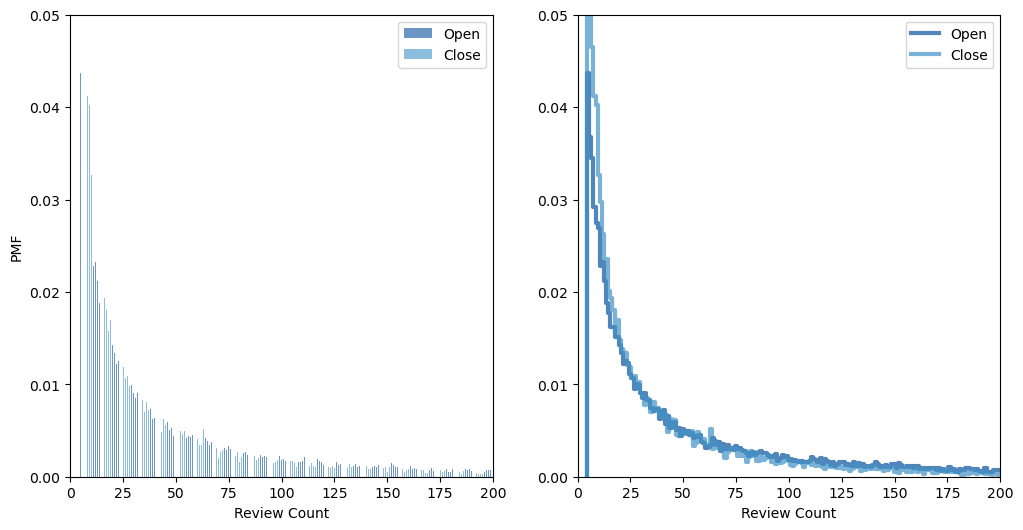

In [205]:
open_pmf = thinkstats2.Pmf(df_rest_open.review_count, label="Open")
close_pmf = thinkstats2.Pmf(df_rest_close.review_count, label="Close")

width = 0.2
axis = [0, 200, 0, .05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(open_pmf, align="right", width=width)
thinkplot.Hist(close_pmf, align="left", width=width)
thinkplot.Config(xlabel="Review Count", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([open_pmf, close_pmf])
thinkplot.Config(xlabel="Review Count", axis=axis)

## CDF

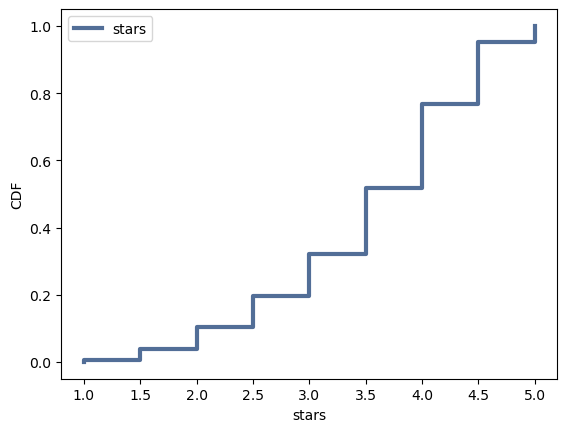

In [216]:
cdf = thinkstats2.Cdf(df_rest_open.stars, label='stars')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='stars', ylabel='CDF', loc='upper left')

In [207]:
cdf.Prob(2.0)

0.10362926741734332

In [215]:
cdf.Value(.5)

32

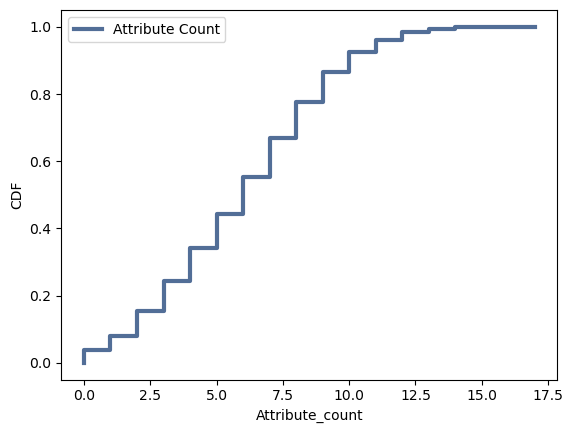

In [212]:
cdf = thinkstats2.Cdf(df_rest_open.attribute_count, label='Attribute Count')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Attribute_count', ylabel='CDF', loc='upper left')

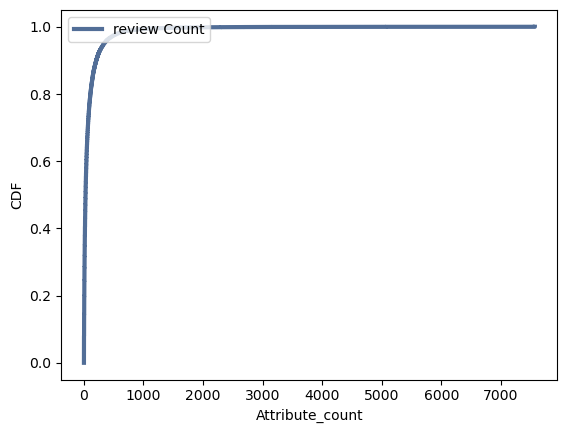

In [214]:
cdf = thinkstats2.Cdf(df_rest_open.review_count, label='review Count')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Attribute_count', ylabel='CDF', loc='upper left')

# Analytical Distribution

In [227]:
attribute_count = df_rest_open.attribute_count.dropna()

review_count = df_rest_open.review_count.dropna()

stars = df_rest_open.stars.dropna()

Mean, Var 5.95772681497757 9.074039216041013
Sigma 3.012314594467353


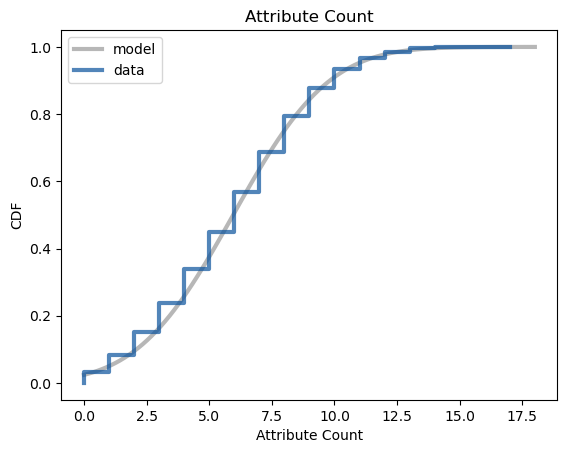

In [228]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(attribute_count, p=0.01)
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=18)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(Attribute_count, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Attribute Count", xlabel="Attribute Count", ylabel="CDF")

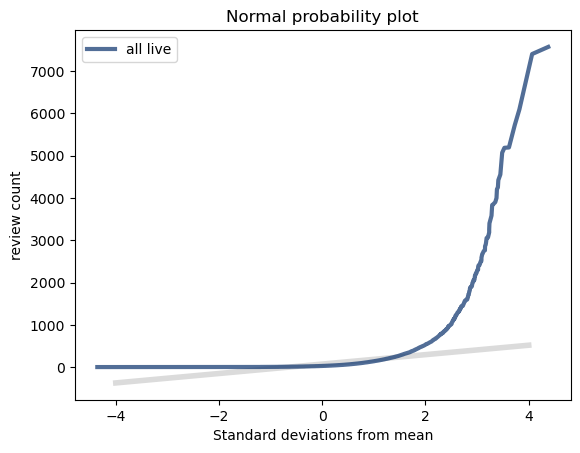

In [229]:
mean, var = thinkstats2.TrimmedMeanVar(review_count, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(review_count)
thinkplot.Plot(xs, ys, label='all live')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='review count')

Mean, Var 3.557367481461137 0.7281414997646642
Sigma 0.8533120764202651


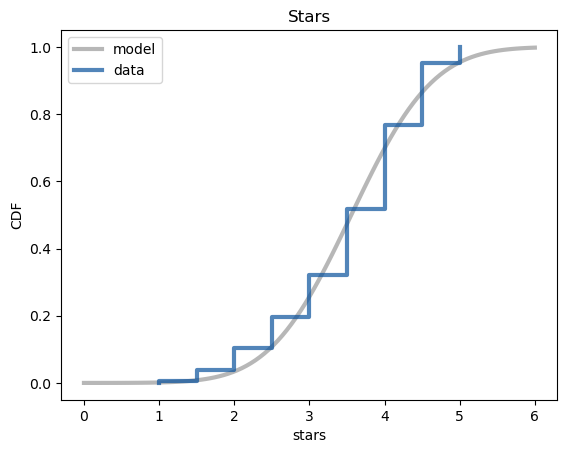

In [230]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(stars, p=0.01)
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=6)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(stars, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Stars", xlabel="stars", ylabel="CDF")

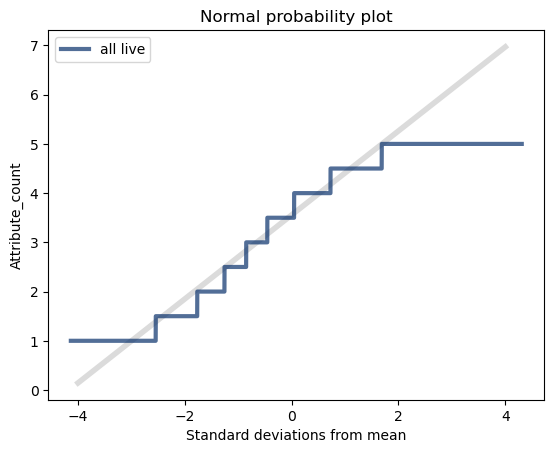

In [231]:
mean, var = thinkstats2.TrimmedMeanVar(stars, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(stars)
thinkplot.Plot(xs, ys, label='all live')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Attribute_count')

# Correlation and Scatterplot

In [274]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov



In [251]:
df_rest_open = df_rest_open.dropna(subset=['stars',  'review_count', 'attribute_count'])

df_checkin_bus = df_checkin_bus.dropna(subset=['checkin_count',  'stars',  'review_count', 'attribute_count'])

attribute_count = df_checkin_bus.attribute_count.dropna()

review_count = df_checkin_bus.review_count.dropna()

stars = df_checkin_bus.stars.dropna()

checkin_count = df_checkin_bus.checkin_count.dropna()


In [242]:
df_checkin_bus.columns


Index(['business_id', 'date', 'checkin_count', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'attribute_count', 'RestaurantsPriceRange2'],
      dtype='object')

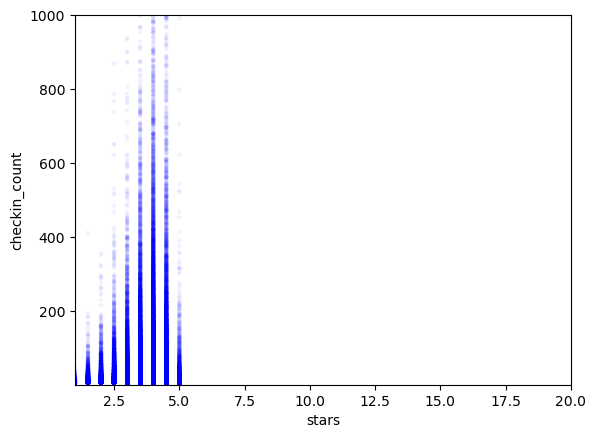

In [257]:
# Solution

thinkplot.Scatter(stars, review_count ,alpha=0.05, s=10)
thinkplot.Config(xlabel='stars',
                     ylabel='checkin_count',
                     ylim=[1, 1000],
                     xlim=[1, 20],
                     legend=False)

In [275]:
print('Corr', Corr(stars, review_count))
print('SpearmanCorr', SpearmanCorr(stars, review_count))
print('Covariance',Cov(stars, review_count))

Corr 0.13531762316280976
SpearmanCorr 0.16744413610960418
Covariance 20.06800901227028


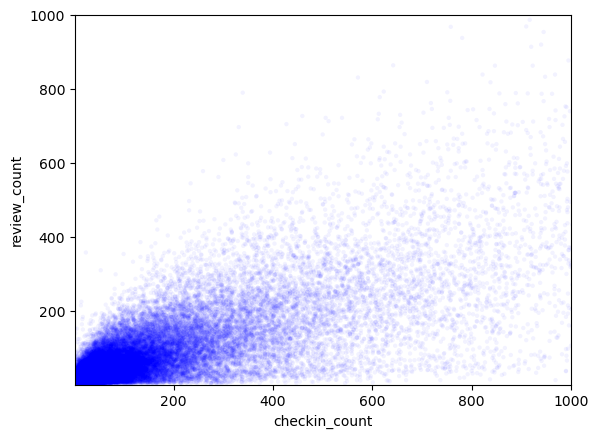

In [260]:
thinkplot.Scatter(checkin_count, review_count ,alpha=0.05, s=10)
thinkplot.Config(xlabel='checkin_count',
                     ylabel='review_count',
                     ylim=[1, 1000],
                     xlim=[1, 1000],
                     legend=False)

In [284]:
print('Corr', Corr(checkin_count, review_count))
print('SpearmanCorr', SpearmanCorr(checkin_count, review_count))
print('Covariance',Cov(checkin_count, review_count))

Corr 0.8035920521399155
SpearmanCorr 0.792269814346371
Covariance 61549.85155726437


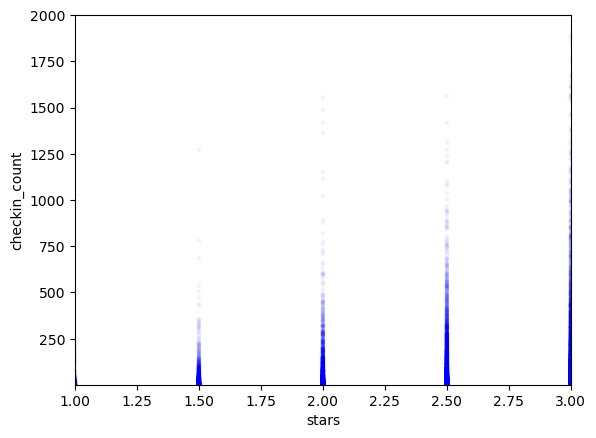

In [289]:
thinkplot.Scatter(stars, checkin_count ,alpha=0.05, s=10)
thinkplot.Config(xlabel='stars',
                     ylabel='checkin_count',
                     xlim=[1, 3],
                     ylim=[1, 2000],
                     legend=False)

In [285]:
print('Corr', Corr(stars, checkin_count))
print('SpearmanCorr', SpearmanCorr(stars, checkin_count))
print('Covariance',Cov(stars, checkin_count))

Corr 0.08189570369762045
SpearmanCorr 0.054097134034676087
Covariance 30.410920148890703


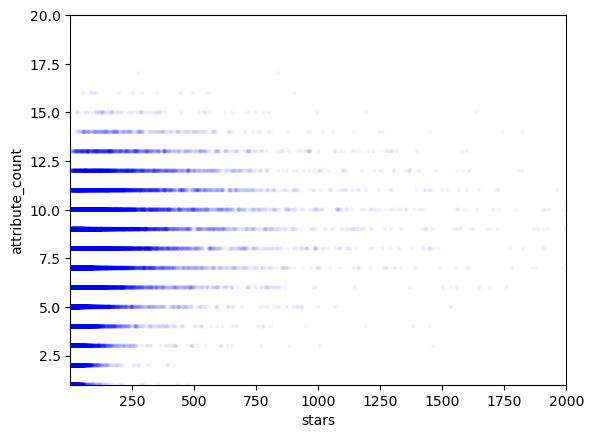

In [270]:
# Solution

thinkplot.Scatter(review_count, attribute_count, alpha=0.05, s=10)
thinkplot.Config(xlabel='stars',
                     ylabel='attribute_count',
                     xlim=[1, 2000],
                     ylim=[1, 20],
                     legend=False)

In [286]:
print('Corr', Corr(review_count, attribute_count))
print('SpearmanCorr', SpearmanCorr(review_count, attribute_count))
print('Covariance',Cov(review_count, attribute_count))

Corr 0.32824353590559235
SpearmanCorr 0.5944844688409044
Covariance 174.03912985725427


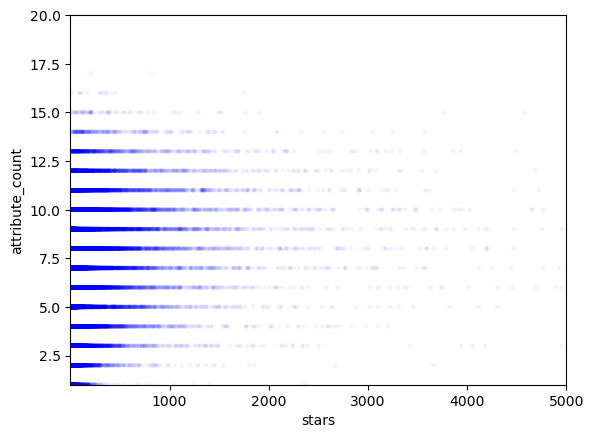

In [272]:
# Solution

thinkplot.Scatter(checkin_count, attribute_count, alpha=0.05, s=10)
thinkplot.Config(xlabel='stars',
                     ylabel='attribute_count',
                     xlim=[1, 5000],
                     ylim=[1, 20],
                     legend=False)

In [280]:
print('Corr', Corr(checkin_count, attribute_count))
print('SpearmanCorr', SpearmanCorr(checkin_count, attribute_count))
print('Covariance',Cov(checkin_count, attribute_count))

Corr 0.22514875124248196
SpearmanCorr 0.4796002123065354
Covariance 298.90885358492835


In [ ]:
If both variables tend to increase or decrease together, the coefficient is positive.
If one variable tends to increase as the other decreases, the coefficient is negative.

Strength: The greater the absolute value of the Pearson correlation coefficient, the stronger the relationship.
The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.
A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.
Direction: The sign of the Pearson correlation coefficient represents the direction of the relationship.
Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Hypothesis Testing

In [ ]:
#Number of Check-in impacts the closure 

In [291]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [292]:
data = df_checkin_bus.checkin_count.values, df_checkin_bus.attribute_count.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue


0.0

The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation.  That means that the p-value is probably smaller than $1/1000$, but it is not actually 0.

To get a sense of how unexpected the observed value is under the null hypothesis, we can compare the actual correlation to the largest value we saw in the simulations.

In [293]:
ht.actual, ht.MaxTestStat()

(0.22514875124248196, 0.01353789155402685)

In [294]:
data = df_checkin_bus.stars.values, df_checkin_bus.attribute_count.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue


0.0

In [295]:
ht.actual, ht.MaxTestStat()

(0.035465210617237466, 0.015260077774240913)

In [ ]:
# Solution

def RunTests(live, iters=1000):
    """Runs the tests from Chapter 9 with a subset of the data.

    live: DataFrame
    iters: how many iterations to run
    """
    n = len(live)
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    # compare pregnancy lengths
    data = firsts.prglngth.values, others.prglngth.values
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)

    data = (firsts.totalwgt_lb.dropna().values,
            others.totalwgt_lb.dropna().values)
    ht = DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)

    # test correlation
    live2 = live.dropna(subset=['agepreg', 'totalwgt_lb'])
    data = live2.agepreg.values, live2.totalwgt_lb.values
    ht = CorrelationPermute(data)
    p3 = ht.PValue(iters=iters)

    # compare pregnancy lengths (chi-squared)
    data = firsts.prglngth.values, others.prglngth.values
    ht = PregLengthTest(data)
    p4 = ht.PValue(iters=iters)

    print('%d\t%0.2f\t%0.2f\t%0.2f\t%0.2f' % (n, p1, p2, p3, p4))

## Regression Test

In [297]:
import statsmodels.formula.api as smf
model = smf.ols('stars ~ checkin_count + review_count + attribute_count', data=df_checkin_bus)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     441.6
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          5.35e-284
Time:                        01:48:39   Log-Likelihood:                -78717.
No. Observations:               63296   AIC:                         1.574e+05
Df Residuals:                   63292   BIC:                         1.575e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5163      0.007    474.702      0.000       3.502       3.531
checkin_count      -0.0001   1.28e-05    -11.658      0.000      -0.000      -0.000
review_count        0.0010   3.31e-05     29.526      0.000       0.001       0.001
attribute_count    -0.0037      0.001     -3.204      0.001      -0.006      -0.001
==============================================================================
Omnibus:                     2721.281   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3068.127
Skew:                          -0.535   Prob(JB):                         0.00
Kurtosis:                       2.866   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""